# import libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum().sum()

np.int64(866)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# step _ 2 : EDA

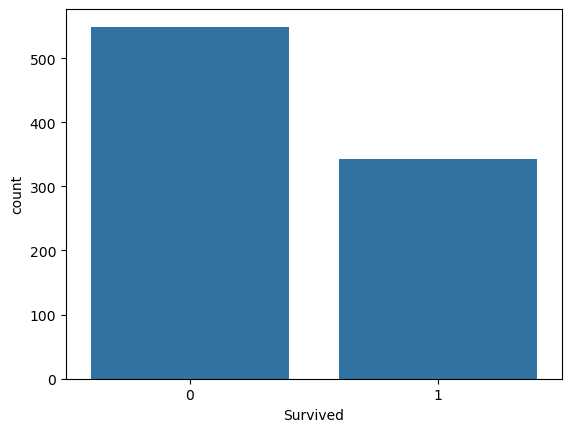

In [6]:
# target distribution
ax = sns.countplot(x = "Survived",data = df)
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

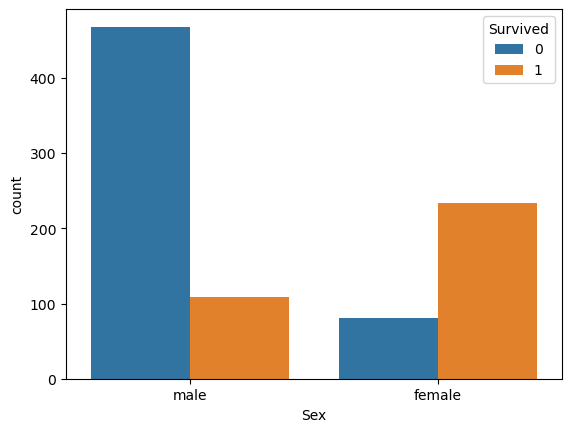

In [7]:
#survived by gender 
sns.countplot(x = "Sex",data = df, hue = "Survived")

<Axes: xlabel='Pclass', ylabel='count'>

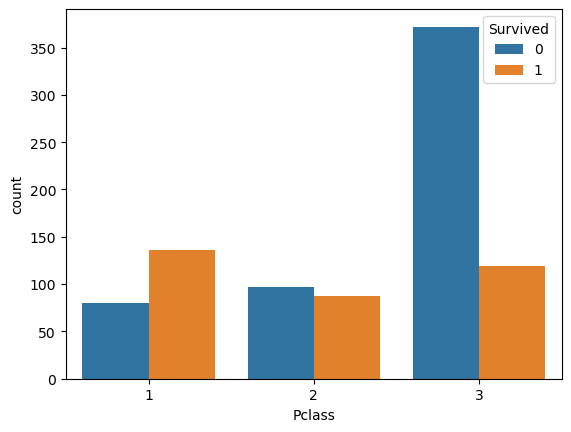

In [8]:
# survived by passenger class
sns.countplot(x = "Pclass",data = df, hue = "Survived")

Text(0.5, 1.0, 'Age Distribution')

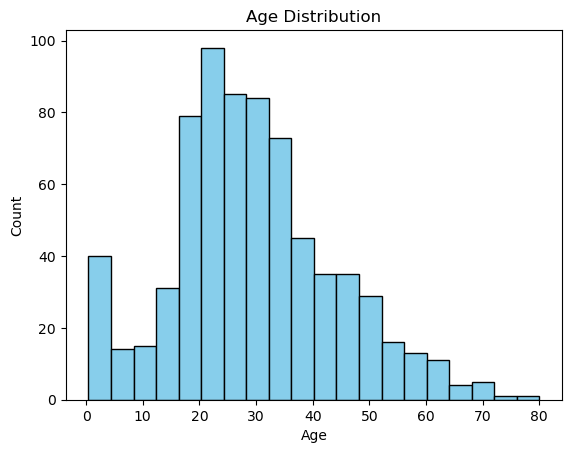

In [9]:
# Age distribution
plt.hist(df["Age"].dropna(),bins = 20, color = "skyblue",edgecolor = "Black")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")

# step 3 : Data cleaning & Preprocessing
# EDA + Data Science

In [10]:
df.drop(["PassengerId","Name","Ticket","Cabin"],axis = 1, inplace = True)

In [11]:
# handle missing values
df["Age"].fillna(df["Age"].median(),inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_13672\2423609567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(),inplace = True)


In [12]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_13672\2929921552.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0],inplace = True)


In [13]:
# one hot encoding
df = pd.get_dummies(df,columns = ["Sex" , "Embarked"],drop_first = True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


# step 4 : modeling >>> Data science

In [14]:
x = df.drop (["Survived"],axis = 1)
y = df["Survived"]

# Train-Test-split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)


# Model_Training
# 1 _ DecisionTree
# 2 _ RandomForest
# 3 _ XGBClassifier 

In [16]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)


In [17]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)


In [18]:
xgb = XGBClassifier(eval_metric = "logloss")
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)


# Step _ 5 = Evaluation

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [20]:
def evaluate_model(y_test,y_pred,model_name):
    print("Function start hua ")
    print(f"\n==={model_name}===")
    print("Accuracy:",accuracy_score(y_test,y_pred))
    print("F1Score:",f1_score(y_test,y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Classification Report:\n",classification_report(y_test,y_pred))

evaluate_model(y_test,y_pred_dt, "DecisionTree")
evaluate_model(y_test,y_pred_rf, "RandomForest" )             
evaluate_model(y_test,y_pred_xgb, "XGBClassifier")                             

Function start hua 

===DecisionTree===
Accuracy: 0.7821229050279329
F1Score: 0.7417218543046358
Confusion Matrix:
 [[84 21]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179

Function start hua 

===RandomForest===
Accuracy: 0.8212290502793296
F1Score: 0.7777777777777778
Confusion Matrix:
 [[91 14]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Function start hua 

===XGBC